## Lab 1.3 - Predicting Real Estate Data in St. Petersburg
We have data from Yandex.Realty classified https://realty.yandex.ru containing real estate listings for apartments in St. Petersburg and Leningrad Oblast from 2016 till the middle of August 2018. In this Lab you'll learn how to apply machine learning algorithms to solve business problems. Accurate price prediction can help to find fraudsters automatically and help Yandex.Realty users to make better decisions when buying and selling real estate.

Using python with machine learning algotithms is the #1 option for prototyping solutions among data scientists today. We'll take a look at it in this lab.

### Main objectives
After successful completion of the lab work students will be able to:
-	Apply machine learning for solving price prediction problem
-   Calculate metrics which can help us find out whether our machine learning model is ready for production

### Tasks
-	Encode dataset
-	Split dataset to train and validation datasets
-	Apply decision tree algorithm to build ML (machine learning) model for price predictions
-   Calculate metrics
-   Try other algorithms and factors to get a better solution 


### 1. Load data with real estate prices

In [1]:
# let's import pandas library and set options to be able to view data right in the browser
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.style as style
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
style.use('fivethirtyeight')
import numpy as np

In [2]:
rent_df_cleaned = pd.read_csv('rent_df_cleaned.csv')

In [3]:
rent_df_cleaned.head()

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,renovation,unified_address,building_id,price_per_sq_m,house_price_sqm_median,last_price_log
0,1100202,2015-01-24T00:00:00+03:00,2016-01-19T00:00:00+03:00,20000.0,7,False,1,False,28.0,8.0,20.0,3.0,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",6719200042030752141,714.285714,512.820513,9.903488
1,4593125,2015-11-17T00:00:00+03:00,2016-03-04T00:00:00+03:00,24000.0,4,False,2,False,59.0,10.0,35.0,3.0,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",6719200042030752141,406.779661,512.820513,10.085809
2,4586184,2015-11-17T00:00:00+03:00,2016-04-24T00:00:00+03:00,18000.0,6,False,1,False,36.0,9.0,17.0,3.0,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",6719200042030752141,500.000000,512.820513,9.798127
3,5308071,2016-02-04T00:00:00+03:00,2016-02-28T00:00:00+03:00,18000.0,8,False,1,False,39.0,10.0,18.0,0.0,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",6719200042030752141,461.538462,512.820513,9.798127
4,7534283612538021121,2016-02-28T00:00:00+03:00,2016-04-02T00:00:00+03:00,19000.0,3,False,1,False,36.0,8.0,18.0,11.0,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",6719200042030752141,527.777778,512.820513,9.852194


In [4]:
rent_df_cleaned['renovation'] = rent_df_cleaned['renovation'].astype(int)

In [5]:
rent_df_cleaned['open_plan'] = rent_df_cleaned['open_plan'].astype(int)

In [6]:
rent_df_cleaned = rent_df_cleaned.drop(rent_df_cleaned.columns[[0, 4, 7, 9, 10, 12, 13, 14, 15]], axis=1)

In [7]:
rent_df_cleaned.head()

,first_day_exposition,last_day_exposition,last_price,open_plan,rooms,area,renovation,last_price_log
0,2015-01-24T00:00:00+03:00,2016-01-19T00:00:00+03:00,20000.0,0,1,28.0,3,9.903488
1,2015-11-17T00:00:00+03:00,2016-03-04T00:00:00+03:00,24000.0,0,2,59.0,3,10.085809
2,2015-11-17T00:00:00+03:00,2016-04-24T00:00:00+03:00,18000.0,0,1,36.0,3,9.798127
3,2016-02-04T00:00:00+03:00,2016-02-28T00:00:00+03:00,18000.0,0,1,39.0,0,9.798127
4,2016-02-28T00:00:00+03:00,2016-04-02T00:00:00+03:00,19000.0,0,1,36.0,11,9.852194


### Self-control stops
1. Compete with other teams to create the best solution. You can play with factors and algorithm parameters to come up with it.

In [8]:
rent_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155392 entries, 0 to 155391
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   first_day_exposition  155392 non-null  object 
 1   last_day_exposition   155392 non-null  object 
 2   last_price            155392 non-null  float64
 3   open_plan             155392 non-null  int64  
 4   rooms                 155392 non-null  int64  
 5   area                  155392 non-null  float64
 6   renovation            155392 non-null  int64  
 7   last_price_log        155392 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 9.5+ MB


In [9]:
#select all offers added in the first 3 months of 2018 as train dataset
train_df = rent_df_cleaned[(rent_df_cleaned.first_day_exposition >= '2018-01-01') 
                           & (rent_df_cleaned.last_day_exposition < '2018-04-01')]

In [10]:
len(train_df)

9473

In [11]:
#select all offers added in april and may 2018 as test dataset
test_df = rent_df_cleaned[(rent_df_cleaned.first_day_exposition >= '2018-04-01') 
                           & (rent_df_cleaned.last_day_exposition < '2018-06-01')]

In [12]:
len(test_df)

7878

In [13]:
#let's use latest data data from 2018-06-01 as holdout dataset to simulate how algorithms would behave in ptoduction
holdout_df = rent_df_cleaned[rent_df_cleaned.first_day_exposition >= '2018-06-01']

In [14]:
len(holdout_df)

21112

In [15]:
train_df = train_df.drop(columns=['first_day_exposition','last_day_exposition','last_price_log'])
test_df = test_df.drop(columns=['first_day_exposition','last_day_exposition', 'last_price_log'])


In [16]:
train_df.head()

,last_price,open_plan,rooms,area,renovation
8,26000.0,0,1,36.0,0
24,17500.0,0,1,32.0,1
25,16000.0,0,1,38.0,0
27,20000.0,0,1,32.0,0
58,50000.0,0,2,85.0,0


In [17]:
#importing libraries
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [18]:
#building decision tree model

In [19]:
X_train = train_df.drop('last_price', axis=1)
y_train = train_df['last_price']
X_valid = test_df.drop('last_price', axis=1)
y_valid = test_df['last_price']
y_train = y_train.values.reshape(-1,1)
y_valid = y_valid.values.reshape(-1,1)
print(X_train)

        open_plan  rooms   area  renovation
8               0      1   36.0           0
24              0      1   32.0           1
25              0      1   38.0           0
27              0      1   32.0           0
58              0      2   85.0           0
...           ...    ...    ...         ...
152221          0      1   31.0           0
152224          0      1   29.0           0
152226          0      2   42.0           0
152272          0      4  200.0           0
152334          0      2   49.0           3

[9473 rows x 4 columns]


In [20]:
#scaling our variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_valid = sc_X.fit_transform(X_valid)
y_train = sc_y.fit_transform(y_train)
y_valid = sc_y.fit_transform(y_valid)

In [21]:
X_train.shape, y_train.shape

((9473, 4), (9473, 1))

In [22]:
tree = DecisionTreeRegressor (max_depth = 3, random_state =17)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=17)

In [23]:
tree_predictions = tree.predict(X_valid).reshape(-1, 1)

In [24]:
tree_predictions[:5]

array([[ 0.03179985],
       [ 0.03179985],
       [ 0.03179985],
       [ 1.11699369],
       [-0.45688854]])

In [25]:
#unscaling our predictions
predictions = sc_y.inverse_transform(tree_predictions[:5])
values = test_df['last_price']

for pred, val in zip(predictions, values):
    print("Prediction: {}, True Value {}".format(pred, val))

Prediction: [27937.0730391], True Value 29000.0
Prediction: [27937.0730391], True Value 35000.0
Prediction: [27937.0730391], True Value 35000.0
Prediction: [45858.91222862], True Value 35000.0
Prediction: [19866.44592408], True Value 30000.0


In [26]:
print ('MAE:', metrics.mean_absolute_error(y_valid, tree_predictions))
print ('MSE:', metrics.mean_squared_error(y_valid, tree_predictions))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, tree_predictions)))

MAE: 0.37082702440044873
MSE: 0.42358299154770535
RMSE: 0.6508325372534054


In [42]:
modeldtr = DecisionTreeRegressor()
params = {
    'splitter' : ['best', 'random'],
    'random_state' : [42],
    'max_depth' : np.arange(1, 40)
}
grid_cvd = GridSearchCV(estimator = modeldtr, param_grid = params, cv=3, n_jobs = -1, scoring='neg_mean_squared_error')

In [43]:
grid_cvd.fit(X_train, y_train)
dtr_params = grid_cvd.best_params_
print('f Best hyperparams: ', grid_cvd.best_params_)
print(f'RMSE score on train sample: {round((-grid_cvd.best_score_) ** 0.5, 2)}\n')

f Best hyperparams:  {'max_depth': 4, 'random_state': 42, 'splitter': 'best'}
RMSE score on train sample: 0.68



In [44]:
model_DTR = DecisionTreeRegressor(max_depth = 4, splitter = 'best', 
                                 random_state = 42)

In [45]:
model_DTR.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [46]:
prediction_rt = model_DTR.predict(X_valid)

In [47]:
print ('MAE:', metrics.mean_absolute_error(y_valid, prediction_rt))
print ('MSE:', metrics.mean_squared_error(y_valid, prediction_rt))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, prediction_rt)))

MAE: 0.36766869028959526
MSE: 0.4167710826037945
RMSE: 0.6455780995385411


In [27]:
#random forest

In [28]:
random_forest_model = RandomForestRegressor (n_estimators=10,
                                             max_depth=10,
                                             min_samples_split=3,
                                             max_features=1)
random_forest_model.fit(X_train, y_train)
predictions = random_forest_model.predict(X_valid).reshape(-1, 1)

print ('MAE:', metrics.mean_absolute_error(y_valid, predictions))
print ('MSE:', metrics.mean_squared_error(y_valid, predictions))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))

MAE: 0.38580635297989824
MSE: 0.5172233006176156
RMSE: 0.7191823834171799


/tmp/ipykernel_112/733712477.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)


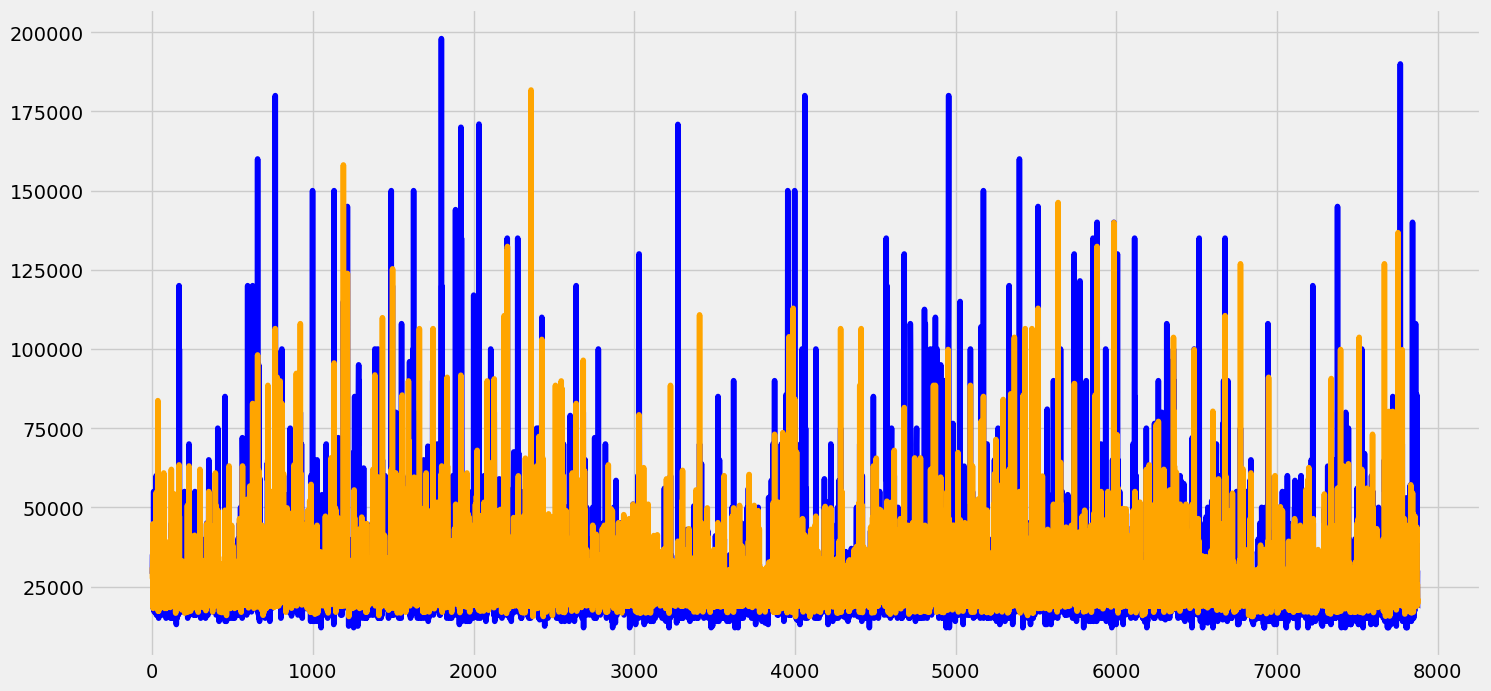

In [29]:
plt.figure(figsize=(16,8))
plt.plot(sc_y.inverse_transform(y_valid), label = 'Test', color = 'blue')
plt.plot(sc_y.inverse_transform(predictions), label = 'Predict', color = 'orange')
plt.show()

In [30]:
#CatBoost

In [31]:
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor (iterations=1500,
                                    depth=7,
                                    learning_rate=0.08,
                                    logging_level='Silent',
                                    thread_count=10,
                                    random_seed=27)
catboost_model.fit(X_train, y_train)
predictions = catboost_model.predict(X_valid).reshape(-1, 1)

print ('MAE:', metrics.mean_absolute_error(y_valid, predictions))
print ('MSE:', metrics.mean_squared_error(y_valid, predictions))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))

MAE: 0.4071368569920198
MSE: 0.5611233817112297
RMSE: 0.7490816922814425


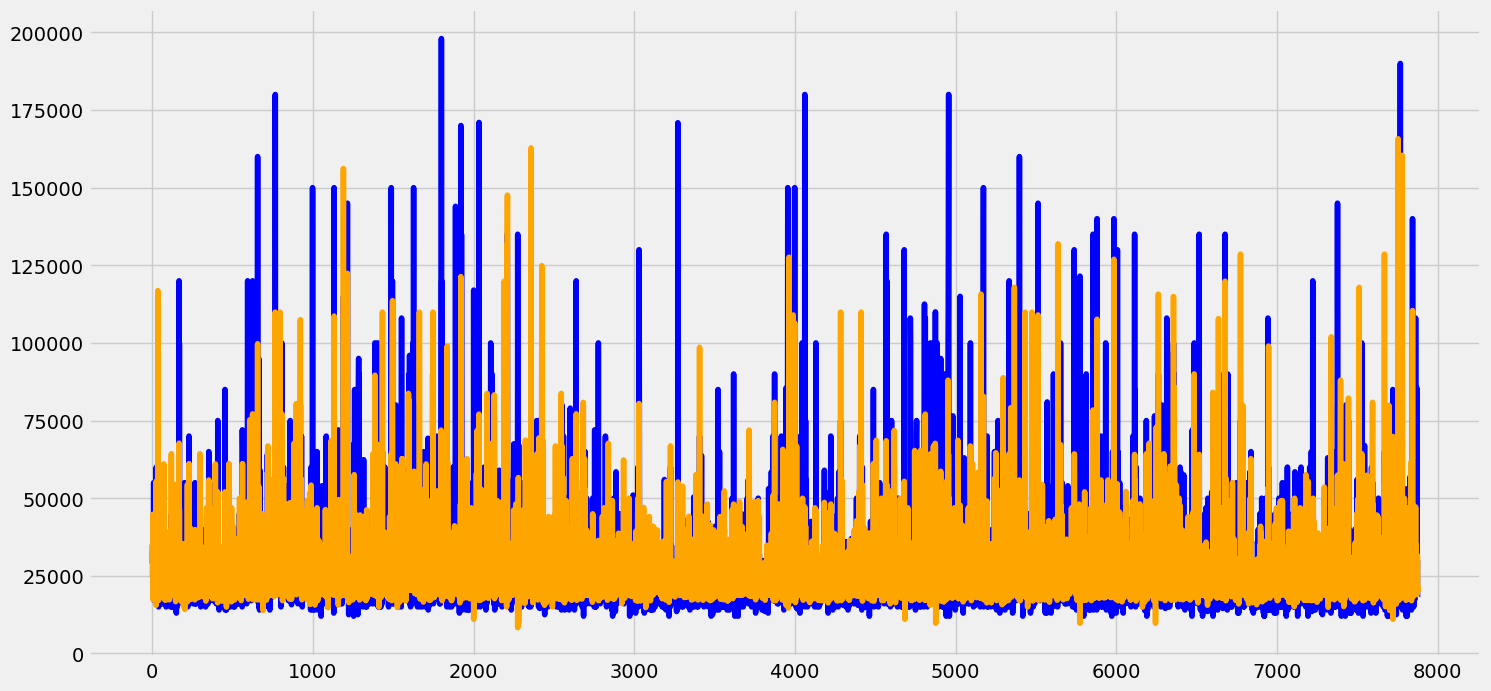

In [32]:
plt.figure(figsize=(16,8))
plt.plot(sc_y.inverse_transform(y_valid), label = 'Test', color = 'blue')
plt.plot(sc_y.inverse_transform(predictions), label = 'Predict', color = 'orange')
plt.show()

In [33]:
#GradientBoostingRegressor

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Ensure y is a 1D array
y_train = y_train.ravel()

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 5, 7]
}

gb_model = GradientBoostingRegressor()

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [35]:
best_params

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}

In [36]:
gb_model.fit(X_train, y_train)
predictions = gb_model.predict(X_valid).reshape(-1, 1)

print ('MAE:', metrics.mean_absolute_error(y_valid, predictions))
print ('MSE:', metrics.mean_squared_error(y_valid, predictions))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))

MAE: 0.3579949447758719
MSE: 0.41166060669177357
RMSE: 0.6416078293566667


In [37]:
import joblib

In [48]:
#saving model
model_file = 'model.pkl'
scaler_x = 'scaler_x.pkl'
scaler_y = 'scaler_y.pkl'
joblib.dump(sc_X, scaler_x)
joblib.dump(sc_y, scaler_y)
joblib.dump(model_DTR, model_file)

['model.pkl']